<a href="https://colab.research.google.com/github/RushiaKawaii693/nhanes_inferential_2023/blob/main/nhanes_inferential_2023_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
library(tidyverse, quietly = TRUE)

In [37]:
library(haven)

dfd <- read_xpt('/DEMO_L (2).xpt')
dfhep <- read_xpt('/HEPB_S_L.xpt')
dfkiq <- read_xpt('/KIQ_U_L.xpt')
dfpaq <- read_xpt('/PAQ_L.xpt')
dfvid <- read_xpt('/VID_L.xpt')
dfwhq <- read_xpt('/WHQ_L.xpt')


In [38]:
library(dplyr)

# Merge all datasets by the participant ID (SEQN)
print("Merging datasets...")

# Start with demographics
df <- dfd

# Merge blood pressure data
df <- df %>% left_join(dfd, by = 'SEQN')

# Merge hepatitis data
df <- df %>% left_join(dfhep, by = 'SEQN')

# Merge kidney data
df <- df %>% left_join(dfkiq, by = 'SEQN')

# Merge physical activity data
df <- df %>% left_join(dfpaq, by = 'SEQN')

# Merge vitamin D data
df <- df %>% left_join(dfvid, by = 'SEQN')

# Merge weight data
df <- df %>% left_join(dfwhq, by = 'SEQN')

print("✓ Merged dataset created!")
print(paste("Total participants:", nrow(df)))
print(paste("Total variables:", ncol(df)))

[1] "Merging datasets..."
[1] "✓ Merged dataset created!"
[1] "Total participants: 11933"
[1] "Total variables: 83"


In [39]:
# See all column names
print("\nColumn names in dataset:")
print(colnames(df))

# Check the shape
print(paste("\nDataset shape:", nrow(df), "x", ncol(df)))
print(paste("(That's", nrow(df), "rows and", ncol(df), "columns)"))

[1] "\nColumn names in dataset:"
 [1] "SEQN"       "SDDSRVYR.x" "RIDSTATR.x" "RIAGENDR.x" "RIDAGEYR.x"
 [6] "RIDAGEMN.x" "RIDRETH1.x" "RIDRETH3.x" "RIDEXMON.x" "RIDEXAGM.x"
[11] "DMQMILIZ.x" "DMDBORN4.x" "DMDYRUSR.x" "DMDEDUC2.x" "DMDMARTZ.x"
[16] "RIDEXPRG.x" "DMDHHSIZ.x" "DMDHRGND.x" "DMDHRAGZ.x" "DMDHREDZ.x"
[21] "DMDHRMAZ.x" "DMDHSEDZ.x" "WTINT2YR.x" "WTMEC2YR.x" "SDMVSTRA.x"
[26] "SDMVPSU.x"  "INDFMPIR.x" "SDDSRVYR.y" "RIDSTATR.y" "RIAGENDR.y"
[31] "RIDAGEYR.y" "RIDAGEMN.y" "RIDRETH1.y" "RIDRETH3.y" "RIDEXMON.y"
[36] "RIDEXAGM.y" "DMQMILIZ.y" "DMDBORN4.y" "DMDYRUSR.y" "DMDEDUC2.y"
[41] "DMDMARTZ.y" "RIDEXPRG.y" "DMDHHSIZ.y" "DMDHRGND.y" "DMDHRAGZ.y"
[46] "DMDHREDZ.y" "DMDHRMAZ.y" "DMDHSEDZ.y" "WTINT2YR.y" "WTMEC2YR.y"
[51] "SDMVSTRA.y" "SDMVPSU.y"  "INDFMPIR.y" "WTPH2YR.x"  "LBXHBS"    
[56] "KIQ022"     "KIQ025"     "KIQ005"     "KIQ010"     "KIQ042"    
[61] "KIQ044"     "KIQ052"     "KIQ481"     "PAD790Q"    "PAD790U"   
[66] "PAD800"     "PAD810Q"    "PAD810U"    "PAD820"     

In [40]:
# List of variables we need for the assignment
required_vars <- c('DMDMARTZ.y', 'DMDEDUC2.x', 'RIDAGEYR.y', 'BPXOSY3',
                   'BPXODI3', 'LBDVD2LC', 'LBXHBS', 'KIQ022',
                   'PAD680', 'WHD020')

print("\nChecking for required variables:")
for (var in required_vars) {
    if (var %in% colnames(df)) {
        print(paste("✓", var, "found"))
    } else {
        print(paste("✗", var, "NOT found - check variable name!"))
    }
}

[1] "\nChecking for required variables:"
[1] "✓ DMDMARTZ.y found"
[1] "✓ DMDEDUC2.x found"
[1] "✓ RIDAGEYR.y found"
[1] "✗ BPXOSY3 NOT found - check variable name!"
[1] "✗ BPXODI3 NOT found - check variable name!"
[1] "✓ LBDVD2LC found"
[1] "✓ LBXHBS found"
[1] "✓ KIQ022 found"
[1] "✓ PAD680 found"
[1] "✓ WHD020 found"


In [41]:
# Display first 5 rows
print("\nFirst 5 rows of data:")
head(df)

[1] "\nFirst 5 rows of data:"


SEQN,SDDSRVYR.x,RIDSTATR.x,RIAGENDR.x,RIDAGEYR.x,RIDAGEMN.x,RIDRETH1.x,RIDRETH3.x,RIDEXMON.x,RIDEXAGM.x,⋯,LBXVD2MS,LBDVD2LC,LBXVD3MS,LBDVD3LC,LBXVE3MS,LBDVE3LC,WHD010,WHD020,WHD050,WHQ070
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
130378,12,2,1,43,NA,5,6,2,NA,⋯,1.57,1,57.3,0,2.47,0,71,190,200,1
130379,12,2,1,66,NA,3,3,2,NA,⋯,1.57,1,58.9,0,3.40,0,70,220,220,2
130380,12,2,2,44,NA,2,2,1,NA,⋯,1.57,1,37.8,0,1.52,0,60,150,165,1
130381,12,2,2,5,NA,5,7,1,71,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
130382,12,2,1,2,NA,3,3,2,34,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
130383,12,1,2,3,NA,2,2,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [42]:
# ============================================================================
# DATA CLEANING AND RECODING
# ============================================================================

print("Starting data cleaning...")

# Make a copy of the data
df_clean <- df

# 1. Recode Marital Status: Married (1) vs Not Married (2-6)
print("\n1. Recoding Marital Status...")
df_clean$marital_status <- ifelse(df_clean$DMDMARTZ.y == 1, 'Married',
                                   ifelse(df_clean$DMDMARTZ.y %in% c(2,3,4,5,6), 'Not Married', NA))
print("Marital Status counts:")
print(table(df_clean$marital_status, useNA = "ifany"))

# 2. Recode Education: Bachelor's or Higher (5) vs Less than Bachelor's (1-4)
print("\n2. Recoding Education Level...")
df_clean$education <- ifelse(df_clean$DMDEDUC2.x == 5, "Bachelor's or Higher",
                              ifelse(df_clean$DMDEDUC2.x %in% c(1,2,3,4), "Less than Bachelor's", NA))
print("Education Level counts:")
print(table(df_clean$education, useNA = "ifany"))

# 3. Clean Sedentary Behavior (PAD680) - remove 7777, 9999
print("\n3. Cleaning Sedentary Behavior (PAD680)...")
print(paste("Before cleaning:", sum(!is.na(df_clean$PAD680)), "valid values"))
df_clean$PAD680[df_clean$PAD680 %in% c(7777, 9999)] <- NA
print(paste("After cleaning:", sum(!is.na(df_clean$PAD680)), "valid values"))

# 4. Clean Self-Reported Weight (WHD020) - remove 7777, 9999
print("\n4. Cleaning Self-Reported Weight (WHD020)...")
print(paste("Before cleaning:", sum(!is.na(df_clean$WHD020)), "valid values"))
df_clean$WHD020[df_clean$WHD020 %in% c(7777, 9999)] <- NA
print(paste("After cleaning:", sum(!is.na(df_clean$WHD020)), "valid values"))

print("\n✓ Data cleaning complete!")
print("\nCleaned dataset ready for analysis!")

[1] "Starting data cleaning..."
[1] "\n1. Recoding Marital Status..."
[1] "Marital Status counts:"

    Married Not Married        <NA> 
       4136        3647        4150 
[1] "\n2. Recoding Education Level..."
[1] "Education Level counts:"

Bachelor's or Higher Less than Bachelor's                 <NA> 
                2625                 5158                 4150 
[1] "\n3. Cleaning Sedentary Behavior (PAD680)..."
[1] "Before cleaning: 8138 valid values"
[1] "After cleaning: 8065 valid values"
[1] "\n4. Cleaning Self-Reported Weight (WHD020)..."
[1] "Before cleaning: 8486 valid values"
[1] "After cleaning: 8358 valid values"
[1] "\n✓ Data cleaning complete!"
[1] "\nCleaned dataset ready for analysis!"


[1] "======================================================================"
[1] "QUESTION 1: Marital Status and Education Association"
[1] "======================================================================"
[1] "\nSample size: 7772 participants"
[1] "\nContingency Table:"
             
              Bachelor's or Higher Less than Bachelor's
  Married                     1631                 2503
  Not Married                  990                 2648
[1] "\n ----------------------------------------------------------------------"
[1] "Chi-Square Test Results:"
[1] "----------------------------------------------------------------------"
[1] "Chi-square statistic: 129.1738"
[1] "Degrees of freedom: 1"
[1] "P-value: 0"
[1] "\n ----------------------------------------------------------------------"
[1] "Interpretation:"
[1] "----------------------------------------------------------------------"
[1] "✓ P-value (0) < 0.05"
[1] "  REJECT the null hypothesis"
[1] "  Conclusion: There IS 

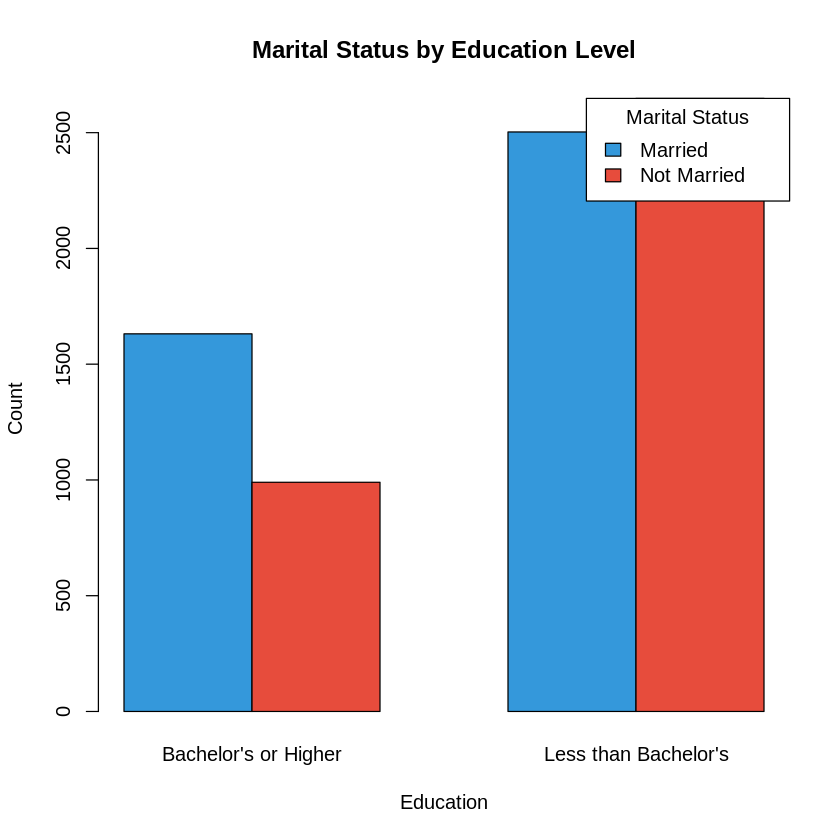

In [43]:
# QUESTION 1: Association between Marital Status and Education
# ============================================================================

print(paste(rep("=", 70), collapse=""))
print("QUESTION 1: Marital Status and Education Association")
print(paste(rep("=", 70), collapse=""))

# Remove missing values
q1_data <- df_clean[complete.cases(df_clean[, c('marital_status', 'education')]),
                    c('marital_status', 'education')]

print(paste("\nSample size:", nrow(q1_data), "participants"))

# Create contingency table
crosstab <- table(q1_data$marital_status, q1_data$education)
print("\nContingency Table:")
print(crosstab)

# Visualize
barplot(crosstab,
        beside = TRUE,
        col = c('#3498db', '#e74c3c'),
        main = 'Marital Status by Education Level',
        xlab = 'Education',
        ylab = 'Count',
        legend.text = TRUE,
        args.legend = list(title = "Marital Status", x = "topright"))

# Chi-square test
chi_test <- chisq.test(crosstab)

print(paste("\n", paste(rep("-", 70), collapse="")))
print("Chi-Square Test Results:")
print(paste(rep("-", 70), collapse=""))
print(paste("Chi-square statistic:", round(chi_test$statistic, 4)))
print(paste("Degrees of freedom:", chi_test$parameter))
print(paste("P-value:", round(chi_test$p.value, 4)))

# Interpretation
print(paste("\n", paste(rep("-", 70), collapse="")))
print("Interpretation:")
print(paste(rep("-", 70), collapse=""))
if (chi_test$p.value < 0.05) {
    print(paste("✓ P-value (", round(chi_test$p.value, 4), ") < 0.05", sep=""))
    print("  REJECT the null hypothesis")
    print("  Conclusion: There IS a significant association between")
    print("              marital status and education level.")
} else {
    print(paste("✗ P-value (", round(chi_test$p.value, 4), ") >= 0.05", sep=""))
    print("  FAIL TO REJECT the null hypothesis")
    print("  Conclusion: There is NO significant association between")
    print("              marital status and education level.")
}

[1] "======================================================================"
[1] "QUESTION 2: Sedentary Behavior by Marital Status"
[1] "======================================================================"
[1] "\nSample size: 7709 participants"
[1] "\nDescriptive Statistics:"
[1] "----------------------------------------------------------------------"
[1] "Married (n=4106):"
[1] "  Mean: 353.29 minutes"
[1] "  SD: 203.88 minutes"
[1] "\nNot Married (n=3603):"
[1] "  Mean: 371.96 minutes"
[1] "  SD: 219.53 minutes"
[1] "\n ----------------------------------------------------------------------"
[1] "Independent t-test Results:"
[1] "----------------------------------------------------------------------"
[1] "t-statistic: -3.8514"
[1] "P-value: 1e-04"
[1] "Mean difference: -18.67 minutes"
[1] "\n ----------------------------------------------------------------------"
[1] "Interpretation:"
[1] "----------------------------------------------------------------------"
[1] "✓ P-value (1e-04

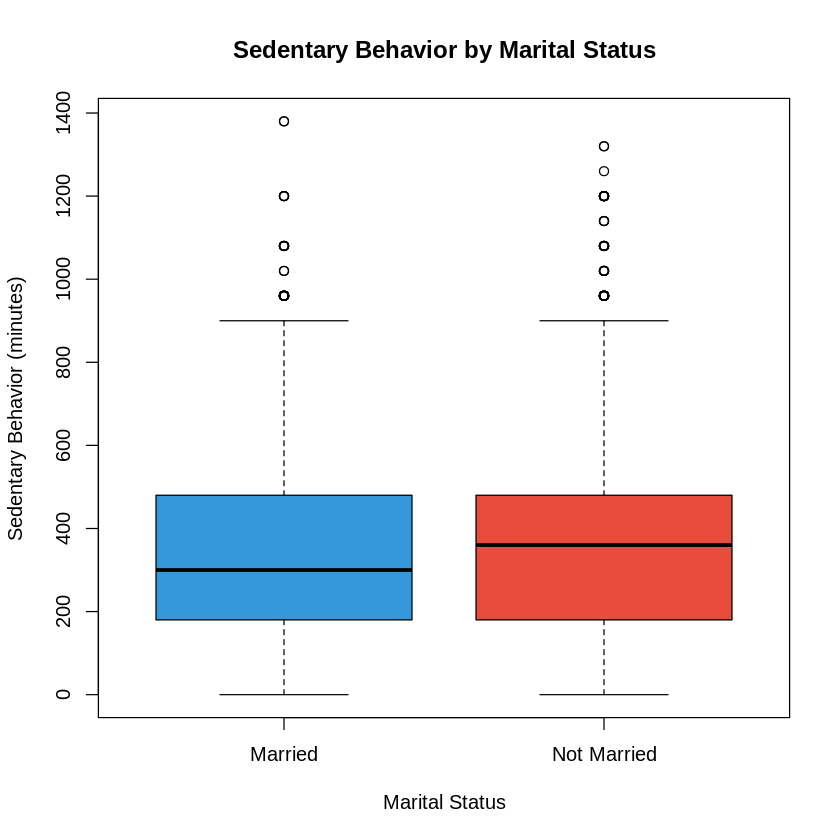

In [44]:
# ============================================================================
# QUESTION 2: Sedentary Behavior by Marital Status
# ============================================================================

print(paste(rep("=", 70), collapse=""))
print("QUESTION 2: Sedentary Behavior by Marital Status")
print(paste(rep("=", 70), collapse=""))

# Remove missing values
q2_data <- df_clean[complete.cases(df_clean[, c('marital_status', 'PAD680')]),
                    c('marital_status', 'PAD680')]

print(paste("\nSample size:", nrow(q2_data), "participants"))

# Split into two groups
married <- q2_data$PAD680[q2_data$marital_status == 'Married']
not_married <- q2_data$PAD680[q2_data$marital_status == 'Not Married']

# Descriptive statistics
print("\nDescriptive Statistics:")
print(paste(rep("-", 70), collapse=""))
print(paste("Married (n=", length(married), "):", sep=""))
print(paste("  Mean:", round(mean(married), 2), "minutes"))
print(paste("  SD:", round(sd(married), 2), "minutes"))
print(paste("\nNot Married (n=", length(not_married), "):", sep=""))
print(paste("  Mean:", round(mean(not_married), 2), "minutes"))
print(paste("  SD:", round(sd(not_married), 2), "minutes"))

# Boxplot
boxplot(PAD680 ~ marital_status, data = q2_data,
        main = 'Sedentary Behavior by Marital Status',
        xlab = 'Marital Status',
        ylab = 'Sedentary Behavior (minutes)',
        col = c('#3498db', '#e74c3c'),
        cex.main = 1.2,
        font.main = 2)

# t-test
t_test <- t.test(married, not_married)

print(paste("\n", paste(rep("-", 70), collapse="")))
print("Independent t-test Results:")
print(paste(rep("-", 70), collapse=""))
print(paste("t-statistic:", round(t_test$statistic, 4)))
print(paste("P-value:", round(t_test$p.value, 4)))
print(paste("Mean difference:", round(mean(married) - mean(not_married), 2), "minutes"))

# Interpretation
print(paste("\n", paste(rep("-", 70), collapse="")))
print("Interpretation:")
print(paste(rep("-", 70), collapse=""))
if (t_test$p.value < 0.05) {
    print(paste("✓ P-value (", round(t_test$p.value, 4), ") < 0.05", sep=""))
    print("  REJECT the null hypothesis")
    print("  Conclusion: There IS a significant difference in sedentary behavior")
    print("              between married and not married individuals.")
} else {
    print(paste("✗ P-value (", round(t_test$p.value, 4), ") >= 0.05", sep=""))
    print("  FAIL TO REJECT the null hypothesis")
    print("  Conclusion: There is NO significant difference in sedentary behavior")
    print("              between married and not married individuals.")
}

[1] "======================================================================"
[1] "QUESTION 4: Weight and Sedentary Behavior Correlation"
[1] "======================================================================"
[1] "\nSample size: 7954 participants"
[1] "\nDescriptive Statistics:"
[1] "----------------------------------------------------------------------"
[1] "Self-Reported Weight:"
[1] "  Mean: 180.64 pounds"
[1] "  SD: 48.14 pounds"
[1] "\nSedentary Behavior:"
[1] "  Mean: 361.91 minutes"
[1] "  SD: 209.46 minutes"
[1] "\n ----------------------------------------------------------------------"
[1] "Pearson Correlation Test Results:"
[1] "----------------------------------------------------------------------"
[1] "Correlation coefficient (r): 0.156"
[1] "P-value: 0"
[1] "R-squared (R²): 0.0243"
[1] "  (2.43% of variance explained)"
[1] "\n ----------------------------------------------------------------------"
[1] "Interpretation:"
[1] "--------------------------------------------

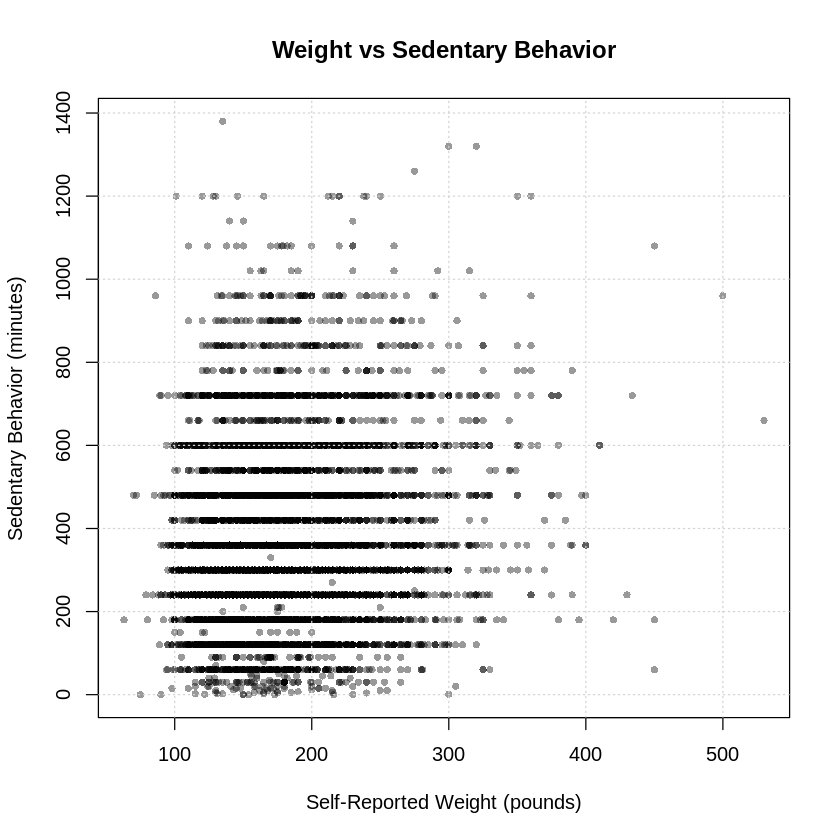

In [45]:
# QUESTION 4: Weight and Sedentary Behavior Correlation
# ============================================================================

print(paste(rep("=", 70), collapse=""))
print("QUESTION 4: Weight and Sedentary Behavior Correlation")
print(paste(rep("=", 70), collapse=""))

# Remove missing values
q4_data <- df_clean[complete.cases(df_clean[, c('WHD020', 'PAD680')]),
                    c('WHD020', 'PAD680')]

print(paste("\nSample size:", nrow(q4_data), "participants"))

weight <- q4_data$WHD020
sedentary <- q4_data$PAD680

# Descriptive statistics
print("\nDescriptive Statistics:")
print(paste(rep("-", 70), collapse=""))
print("Self-Reported Weight:")
print(paste("  Mean:", round(mean(weight), 2), "pounds"))
print(paste("  SD:", round(sd(weight), 2), "pounds"))
print("\nSedentary Behavior:")
print(paste("  Mean:", round(mean(sedentary), 2), "minutes"))
print(paste("  SD:", round(sd(sedentary), 2), "minutes"))

# Scatter plot
plot(weight, sedentary,
     xlab = 'Self-Reported Weight (pounds)',
     ylab = 'Sedentary Behavior (minutes)',
     main = 'Weight vs Sedentary Behavior',
     pch = 16,
     col = rgb(0, 0, 0, 0.4),
     cex = 0.8,
     cex.main = 1.2,
     font.main = 2)
grid()

# Correlation test
corr_test <- cor.test(weight, sedentary, method = "pearson")
corr_coef <- corr_test$estimate
p_value <- corr_test$p.value

print(paste("\n", paste(rep("-", 70), collapse="")))
print("Pearson Correlation Test Results:")
print(paste(rep("-", 70), collapse=""))
print(paste("Correlation coefficient (r):", round(corr_coef, 4)))
print(paste("P-value:", round(p_value, 4)))
print(paste("R-squared (R²):", round(corr_coef^2, 4)))
print(paste("  (", round(corr_coef^2 * 100, 2), "% of variance explained)", sep=""))

# Interpretation
print(paste("\n", paste(rep("-", 70), collapse="")))
print("Interpretation:")
print(paste(rep("-", 70), collapse=""))
if (p_value < 0.05) {
    print(paste("✓ P-value (", round(p_value, 4), ") < 0.05", sep=""))
    print("  REJECT the null hypothesis")
    if (corr_coef > 0) {
        print(paste("  Conclusion: Weight is POSITIVELY correlated with sedentary behavior (r=",
                    round(corr_coef, 4), ")", sep=""))
        print("              As weight increases, sedentary behavior tends to increase.")
    } else {
        print(paste("  Conclusion: Weight is NEGATIVELY correlated with sedentary behavior (r=",
                    round(corr_coef, 4), ")", sep=""))
        print("              As weight increases, sedentary behavior tends to decrease.")
    }
} else {
    print(paste("✗ P-value (", round(p_value, 4), ") >= 0.05", sep=""))
    print("  FAIL TO REJECT the null hypothesis")
    print("  Conclusion: There is NO significant correlation between weight and sedentary behavior.")
}

[1] "======================================================================"
[1] "QUESTION 5: Creative Analysis"
[1] "======================================================================"
[1] "\n📋 RESEARCH QUESTION:"
[1] "Does education level affect self-reported weight?"
[1] "\n📊 STATISTICAL TEST: Independent t-test"
[1] "WHY: Comparing a continuous variable (weight) across 2 groups (education)"
[1] "\nSample size: 7676 participants"
[1] "\nDescriptive Statistics:"
[1] "----------------------------------------------------------------------"
[1] "Bachelor's or Higher (n=2599):"
[1] "  Mean Weight: 176.86 pounds"
[1] "  SD: 44.2 pounds"
[1] "\nLess than Bachelor's (n=5077):"
[1] "  Mean Weight: 183.81 pounds"
[1] "  SD: 49.71 pounds"
[1] "\n ----------------------------------------------------------------------"
[1] "Independent t-test Results:"
[1] "----------------------------------------------------------------------"
[1] "t-statistic: -6.252"
[1] "P-value: 0"
[1] "Mean difference:

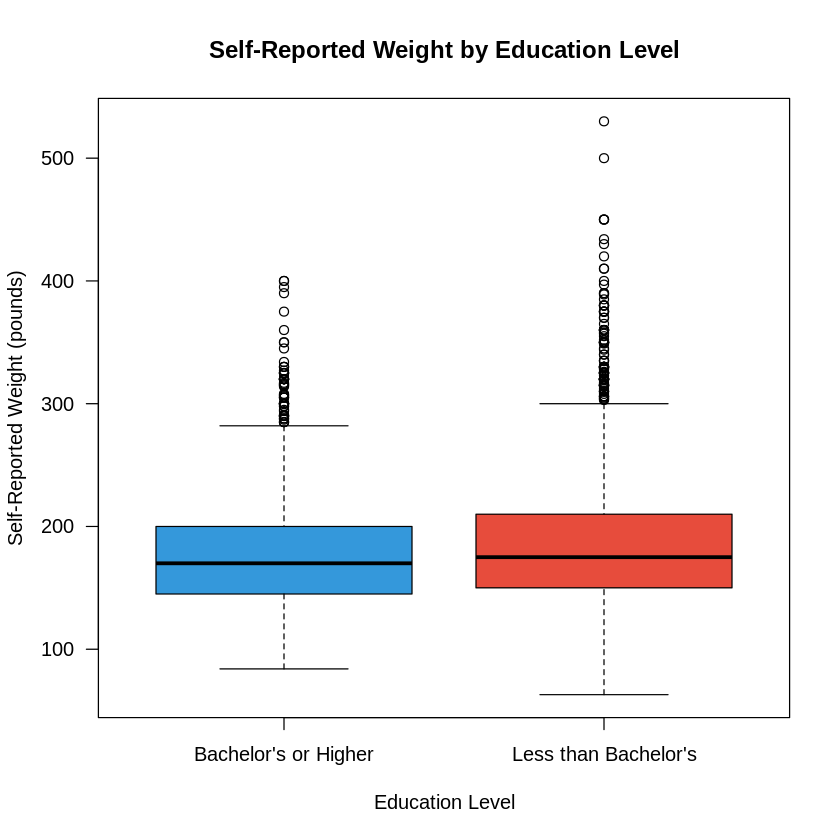

In [46]:
# ============================================================================
# QUESTION 5: Creative Analysis - Education and Weight
# ============================================================================

print(paste(rep("=", 70), collapse=""))
print("QUESTION 5: Creative Analysis")
print(paste(rep("=", 70), collapse=""))

print("\n📋 RESEARCH QUESTION:")
print("Does education level affect self-reported weight?")
print("\n📊 STATISTICAL TEST: Independent t-test")
print("WHY: Comparing a continuous variable (weight) across 2 groups (education)")

# Remove missing values
q5_data <- df_clean[complete.cases(df_clean[, c('education', 'WHD020')]),
                    c('education', 'WHD020')]

print(paste("\nSample size:", nrow(q5_data), "participants"))

# Split into two groups
bachelors <- q5_data$WHD020[q5_data$education == "Bachelor's or Higher"]
less_than_bachelors <- q5_data$WHD020[q5_data$education == "Less than Bachelor's"]

# Descriptive statistics
print("\nDescriptive Statistics:")
print(paste(rep("-", 70), collapse=""))
print(paste("Bachelor's or Higher (n=", length(bachelors), "):", sep=""))
print(paste("  Mean Weight:", round(mean(bachelors), 2), "pounds"))
print(paste("  SD:", round(sd(bachelors), 2), "pounds"))
print(paste("\nLess than Bachelor's (n=", length(less_than_bachelors), "):", sep=""))
print(paste("  Mean Weight:", round(mean(less_than_bachelors), 2), "pounds"))
print(paste("  SD:", round(sd(less_than_bachelors), 2), "pounds"))

# Boxplot
boxplot(WHD020 ~ education, data = q5_data,
        main = 'Self-Reported Weight by Education Level',
        xlab = 'Education Level',
        ylab = 'Self-Reported Weight (pounds)',
        col = c('#3498db', '#e74c3c'),
        cex.main = 1.2,
        font.main = 2,
        las = 1)

# t-test
t_test <- t.test(bachelors, less_than_bachelors)

print(paste("\n", paste(rep("-", 70), collapse="")))
print("Independent t-test Results:")
print(paste(rep("-", 70), collapse=""))
print(paste("t-statistic:", round(t_test$statistic, 4)))
print(paste("P-value:", round(t_test$p.value, 4)))
print(paste("Mean difference:", round(mean(bachelors) - mean(less_than_bachelors), 2), "pounds"))

# Interpretation
print(paste("\n", paste(rep("-", 70), collapse="")))
print("Interpretation:")
print(paste(rep("-", 70), collapse=""))
if (t_test$p.value < 0.05) {
    print(paste("✓ P-value (", round(t_test$p.value, 4), ") < 0.05", sep=""))
    print("  REJECT the null hypothesis")
    print("  Conclusion: Education level DOES significantly affect self-reported weight.")
} else {
    print(paste("✗ P-value (", round(t_test$p.value, 4), ") >= 0.05", sep=""))
    print("  FAIL TO REJECT the null hypothesis")
    print("  Conclusion: Education level DOES NOT significantly affect self-reported weight.")
}

print(paste("\n", paste(rep("=", 70), collapse="")))
print("ALL ANALYSES COMPLETE! 🎉")
print(paste(rep("=", 70), collapse=""))